In [97]:
import numpy as np
import matplotlib.pyplot as plt
import kmeans
np.random.seed(42)
%matplotlib inline

## 练习1

对聚类结果可视化（包含样本点和簇中心，用不同颜色、记号标记）

In [76]:
dataset = np.mat(kmeans.loadDataSet('./testSet.txt'))

D:\pycodes\machine_learning\venv\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
D:\pycodes\machine_learning\venv\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


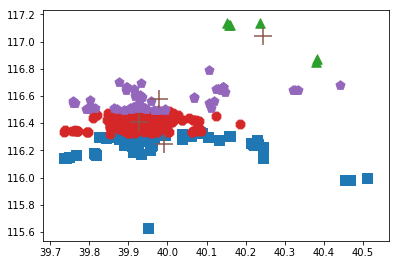

In [77]:
kmeans.clusterPlaces()

## 练习2

各函数测试如下

In [78]:
dataset = np.mat(kmeans.loadDataSet('./testSet.txt'))

In [79]:
kmeans.randCent(dataset, 2)

matrix([[-5.1693837 ,  3.61150935],
        [ 4.53068135, -2.23171753]])

In [80]:
kmeans.distEclud(dataset[0], dataset[1])

5.184632816681332

In [81]:
kmeans.distSLC(dataset[0], dataset[1])

575.2304643717347

In [82]:
myCentroids, clustAssing = kmeans.kMeans(dataset, 4)

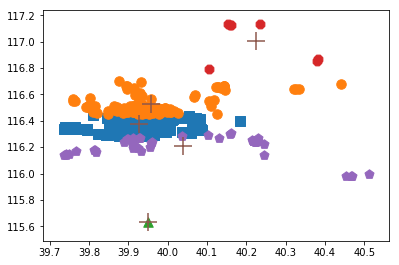

In [83]:
kmeans.clusterPlaces()

## 练习3

In [92]:
import sklearn
from sklearn.cluster import DBSCAN

In [113]:
dbscan = DBSCAN(min_samples=5)
db = dbscan.fit(dataset)

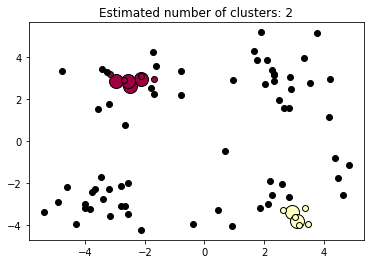

In [115]:
labels = db.labels_
unique_labels = set(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dataset[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 练习4